# Bayesian statistics
### Example via Jack Bennetto (thanks Jack)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Success Criteria
I will feel successful today if I can...

 * Describe the difference between Frequentist and Bayesian statistics
 * ID different components of Bayes Theorem
 * Use Bayes' theorem to calculate posterior probabilities 


### Bayes' theorem.

This Theorem is usually written using variables A and B... 

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

Each term has a name.

* $P(A)$ is the *prior probability*
* $P(B|A)$ is the *likelihood*.
* $P(B)$ is the *marglinal likelihood* sometimes called *normalization constant*
* $P(A|B)$ is the *posterior probability*.




Suppose we're considering some hypothesis $H$ and we've collected some data $\mathbf{X}$.
$$ P(H|\mathbf{X}) = \frac{P(\mathbf{X}|H) P(H)}{P(\mathbf{X})} $$



If there are a bunch of hypotheses $H_1, H_2, ... H_n$, we could write this as

$$\begin{align}
P(H_i|\mathbf{X}) & = \frac{P(\mathbf{X}|H_i) P(H_i)}{P(\mathbf{X})}\\
         & = \frac{P(\mathbf{X}|H_i) P(H_i)}{\sum_{j=0}^{n} P(\mathbf{X}|H_j) P(H_j)}
\end{align}
$$

Here we see the normalizing constant is the likelihood times the prior summed over all possible hypotheses (using the law of total probability).

In other words, it's the constant (independent of hypothesis) needed to be multiplied by all the numerators so that they all add up to one.

Let's run through an example.

### Bayesian statistics to find a mean
Let's assume you have a bunch of points drawn from a normal distribution. To make things easy, let's say you happen to know that the standard deviation is 3, and the mean $\mu \in \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$. We're going to determine the probability that any of those are the correct mean based on data.

Humans are pretty bad at choosing random numbers, so someone will need to run this.

In [4]:
stats.randint(0,10).rvs()

9

In [12]:
np.log(0.0007)

-7.264430222920869

In [5]:
np.random.seed(42)
mu = stats.randint(0,10).rvs()
sd = 3

# Now you need to choose a number from the distribution. What is it?
first_X = stats.norm(mu, sd).rvs()
first_X

4.349296532508152

Great! So now using that number, I'm going to figure out the likelihood you would have gotten that from any of the possible hypotheses, by looking at the **pdf** of the distribution.

In [9]:
datum = first_X
likelihoods = []
for mu_i in range(0,10):
    likelihoods.append(stats.norm(mu_i, sd).pdf(datum))
    print(f"The likelihood of N({mu_i}, {sd}) generating {datum:.2f} is {likelihoods[mu_i]:.4f}")

The likelihood of N(0, 3) generating 4.35 is 0.0465
The likelihood of N(1, 3) generating 4.35 is 0.0713
The likelihood of N(2, 3) generating 4.35 is 0.0979
The likelihood of N(3, 3) generating 4.35 is 0.1202
The likelihood of N(4, 3) generating 4.35 is 0.1321
The likelihood of N(5, 3) generating 4.35 is 0.1299
The likelihood of N(6, 3) generating 4.35 is 0.1143
The likelihood of N(7, 3) generating 4.35 is 0.0900
The likelihood of N(8, 3) generating 4.35 is 0.0634
The likelihood of N(9, 3) generating 4.35 is 0.0400


''

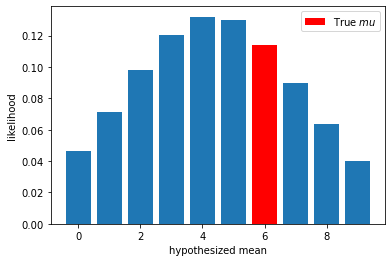

In [10]:
fig, ax = plt.subplots()
ax.bar(range(10), likelihoods)
ax.bar(mu, likelihoods[mu], color = 'r', label = r'True ${mu}$')
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('likelihood')
ax.legend()
;

**Question:** Do these bars all add to one?

Which of these hypotheses has the maximum likelihood of producing the data?

If we were a Frequentist, we'd go with that, and then we'd construct a confidence interval, giving a range that (had we sampled from the data many times) has a certain probability (maybe 95%) of including the actual value.

But today we're all going to be Bayesians, which means we're going to assign probabilities of each hypothesis being true.

The tough part of being a Bayesian is we need to start out with a prior probabilities. For this, we'll assume that all the probabilities are equal. You chose them that way using the computer, so that works out, but if you'd picked a number from your head, and you liked some numbers more than others, that might not be best.

The arbitrary choice of priors is probably **the largest criticism** of Bayesian statistics. But if you have enough data it doesn't matter that much.

Dont Forget... Here is our Bayesian formula


$$\begin{align}
P(H_i|\mathbf{X}) & = \frac{P(\mathbf{X}|H_i) P(H_i)}{P(\mathbf{X})}\\
         & = \frac{P(\mathbf{X}|H_i) P(H_i)}{\sum_{j=0}^{n} P(\mathbf{X}|H_j) P(H_j)}
\end{align}
$$

In [13]:
probs = np.ones(10)/10
probs

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Now we need to multiple each of these by the likelihood...

In [14]:
for i in range(10):
    probs[i] *= stats.norm(i, sd).pdf(datum)

probs

array([0.00464927, 0.0071307 , 0.00978644, 0.01201883, 0.01320824,
       0.01298892, 0.01142999, 0.00900044, 0.00634201, 0.00399885])

...and then divide normalize them by dividing them each by the sum:

In [37]:
# example 
a = np.array([1,2,3,4,5,4,3,2,1])
sum(a / a.sum())

1.0

In [32]:
probs /= probs.sum()

So again, what we've done is multiplied each of the prior probabilities by the likelihood of each hypothesis of generating the observed data, and divided these all by the normalizing constant, to get the posterior probabilities.
$$\begin{align}
P(H_i|\mathbf{X}) & = \frac{P(\mathbf{X}|H_i) P(H_i)}{P(\mathbf{X})}\\
         & = \frac{P(\mathbf{X}|H_i) P(H_i)}{\sum_{j=0}^{n} P(\mathbf{X}|H_j) P(H_j)}
\end{align}
$$



In [39]:
probs

array([0.05134266, 0.07874553, 0.10807334, 0.13272608, 0.14586094,
       0.14343886, 0.12622335, 0.09939342, 0.07003588, 0.04415996])

Let's see what we got for the **probabilities**.

The probability of N(0, 3) being correct is 0.0513
The probability of N(1, 3) being correct is 0.0787
The probability of N(2, 3) being correct is 0.1081
The probability of N(3, 3) being correct is 0.1327
The probability of N(4, 3) being correct is 0.1459
The probability of N(5, 3) being correct is 0.1434
The probability of N(6, 3) being correct is 0.1262
The probability of N(7, 3) being correct is 0.0994
The probability of N(8, 3) being correct is 0.0700
The probability of N(9, 3) being correct is 0.0442


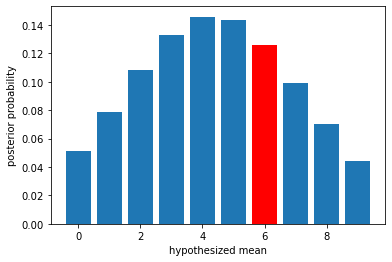

In [38]:
for i in range(0,10):
    print(f"The probability of N({i}, {sd}) being correct is {probs[i]:6.4f}")

fig, ax = plt.subplots()
ax.bar(range(10), probs)
ax.bar(mu, probs[mu], color = 'r', label = r'True ${mu}$')
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('posterior probability');

**Question:** Do these add up to one?

Okay, that was great, but maybe we should get some more data. Generate another number!

In [40]:
another_X = stats.norm(mu, sd).rvs()
another_X

7.546299217351222

# Now we
 * calculate the likelihoods,
 * multiply these **by our old posterior probabilities** (which are the new priors),
 * normalize (divide the sum of the prior times likelihood, so they add to one), and
 * look at the output.

The probability of N(0, 3) of 7.55 being correct is 0.00021851
The probability of N(1, 3) of 7.55 being correct is 0.00160418
The probability of N(2, 3) of 7.55 being correct is 0.00843863
The probability of N(3, 3) of 7.55 being correct is 0.03180735
The probability of N(4, 3) of 7.55 being correct is 0.08590494
The probability of N(5, 3) of 7.55 being correct is 0.16624323
The probability of N(6, 3) of 7.55 being correct is 0.23051805
The probability of N(7, 3) of 7.55 being correct is 0.22903459
The probability of N(8, 3) of 7.55 being correct is 0.16305435
The probability of N(9, 3) of 7.55 being correct is 0.08317616


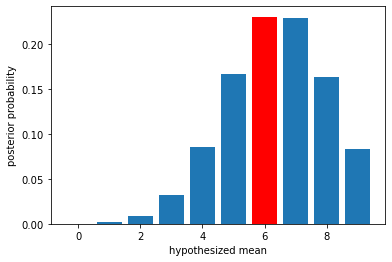

In [43]:
datum = another_X

# calculate the likelihoods
for i in range(10):
#     multiply these by our old posterior probabilities (which are the new priors),
    probs[i] *= stats.norm(i, sd).pdf(datum)
# normalize (divide the sum of the prior times likelihood, so they add to one)
probs /= probs.sum()

# look at the output
for i in range(0,10):
    print(f"The probability of N({i}, {sd}) of {datum:.2f} being correct is {probs[i]:10.8f}")
    
fig, ax = plt.subplots()
ax.bar(range(10), probs)
ax.bar(mu, probs[mu], color = 'r', label = r'True ${mu}$')
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('posterior probability');

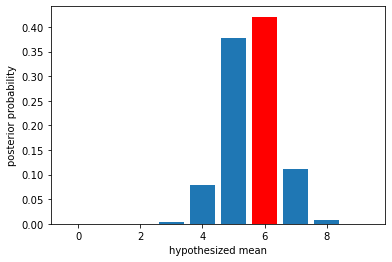

In [44]:
# and again... our "posteriors" replace our priors and we update our situation over and over and over...
for _ in range(10):
    datum = stats.norm(mu, sd).rvs()

    # calculate the likelihoods
    for i in range(10):
    #     multiply these by our old posterior probabilities (which are the new priors),
        probs[i] *= stats.norm(i, sd).pdf(datum)
    # normalize (divide the sum of the prior times likelihood, so they add to one)
    probs /= probs.sum()

fig, ax = plt.subplots()
ax.bar(range(10), probs)
ax.bar(mu, probs[mu], color = 'r', label = r'True ${mu}$')
ax.set_xlabel('hypothesized mean')
ax.set_ylabel('posterior probability');

We're doing this iteratively, repeatedly getting another data point and updating our prior, but we could have done this all at once, calculating the likelihood of seeing the whole dataset.

In a real problem we'd have *many* more possible hypotheses. In the case above, we might not know the number came from a discrete distribution so we'd need to consider every possible value. And we probably wouldn't know the standard deviation, so we'd need to consider every combination of a mean and standard deviation. We could follow the same approach, calculating the likelihood of seeing our data for each possible hypothesis and updating the posterior probabilities. Later we'll talk about how to solve this practically...

In [49]:
def mle(data, std):
    mu_lst = np.linspace(0, max(data), 250)
    likelihoods = [stats.norm(mu,std).pdf(data) for mu in mu_lst]
    log_likelihood = [np.sum(np.log(like)) for like in likelihoods]
    arg_max = np.argmax(log_likelihood)
    return mu_lst[arg_max]

In [50]:
sd = 3
data = stats.norm(mu, sd).rvs(100)

mle(data, sd)

6.075358176458589


### A Tangible Example 

##### Example via RFT

#### Fair or Unfair Coin

Let's say we picked one of two coins.  One isn't fair (pHeads = 0.40) while the other one is (pHeads = 0.5).  After a certain number of flips, what is our degree of belief that the results came from each of the coins?

Bayes rule for this example:

Your Hypotheses available are only... 

$H_i$ = **Fair OR Unfair**


\begin{equation*}
p(H_i | Flips)   = \frac{p(Flips | H_i) \times p(H_i)}{p(Flips)}
\end{equation*}


At the start, there is an equal probability of picking either coin:

$$ p(Fair) = p(Unfair) = 0.5 $$


$p(Flips)$ is calculated using the Law of Total Probability: 

$$p(Flips) = p(Flips|Fair)\times p(Fair) + p(Flips|Unfair)\times p(Unfair) $$

If we have just one flip (a tails):

$$p(tails) = p(tails|Fair)\times p(Fair) + p(tails|Unfair)\times p(Unfair)$$

$$p(tails) = 0.5\times 0.5 + 0.6\times 0.5 = 0.55$$

If we have just one flip (a heads):

$$p(heads) = p(heads|Fair)\times p(Fair) + p(heads|Unfair)\times p(Unfair)$$

$$p(heads) = 0.5\times 0.5 + 0.4\times 0.5 = 0.45$$

If we have zero flips, $P(flips)=1$ as default.


We'll keep track of the probabilities in a list:  
$$ [p(Fair), p(Unfair)] $$ 
<br>


In [51]:
np.random.seed(37) # try to make it so that we all get the same result

# make the coins and select one
p_fair = 0.5 # don't change

p_not_fair = 0.4 

# Pick one of these two values to be the p of the coin we chose
p = np.random.choice([p_fair, p_not_fair])
p

0.4

In [53]:
def indicate_coin_picked(p):
    if p == .5:
        print("It's the fair coin (p = 0.5).")
    else:
        print(f"It's the unfair coin (p = {p}).")

indicate_coin_picked(p)

It's the unfair coin (p = 0.4).


### Can we figure out, from the flips, whether it's a fair coin or not?  And if so, how soon can we know it?

In [55]:
np.random.random()

0.5240855752884971

In [56]:
# helper function 1

def flip_the_coin(p, flips_lst):
    '''Flips the coin with probability of success p
       and appends to the flips_lst'''
    flips_lst.append(1*(np.random.random()<=p))

In [57]:
# test it out - initialize flips_lst
flips_lst = []

In [58]:
# do some flips (trials) - keep executing this cell
flip_the_coin(p, flips_lst)
print(flips_lst, round(np.mean(flips_lst),3))

[0] 0.0


# Now we
 * calculate the likelihoods,


In [60]:
# Calculate our likelihoods

def calculate_likelihood(flips_lst):
    '''Likelihood of flips in flips_lst given fair, not fair coin'''
    likelihood_fair = stats.bernoulli.pmf(flips_lst[-1], p_fair)
    likelihood_not_fair = stats.bernoulli.pmf(flips_lst[-1], p_not_fair)
    return [likelihood_fair, likelihood_not_fair]

In [61]:
# Let's double check that function
likelihoods = calculate_likelihood(flips_lst)
print(np.around(likelihoods,3))
print("\nLikelihood fair: {0:0.3f}".format(likelihoods[0]))
print("Likelihood not fair: {0:0.3f}".format(likelihoods[1]))

[0.5 0.6]

Likelihood fair: 0.500
Likelihood not fair: 0.600


In [68]:
# # Calculate likelihoods for the entire result (Mekdi's attempt)
# def calc_likelihood(flip_lst):
#     fair_likelihood = stats.bernoulli(p_fair).pmf(flip_lst)
#     unfair_likelihood = stats.bernoulli(p_unfair)


\begin{equation*}
p(H_i | Flips)   = \frac{p(Flips | H_i) \times p(H_i)}{p(Flips)}
\end{equation*}


\begin{equation*}
posterior   = \frac{likelihood \times prior}{marginal}
\end{equation*}

*remember marginal likelihood is aka normalization constant*

 * multiply these **by our old posterior probabilities** (which are the new priors),
 * normalize (divide the sum of the prior times likelihood, so they add to one), and


In [69]:
a = np.array([1,2,3])
b = np.array([4])
a = np.concatenate((a,b))
a

a = [1,2,3]
b = np.array([i for i in a])
b

array([1, 2, 3])

In [71]:
# helper function 3
marginal = 1  # placeholder, If we have zero flips, P(flips)=1 as default.

def calculate_posterior(likelihoods_lst, prior_lst):
    '''Calculates the posterior given the likelihoods and prior
    '''
    posterior_unnormalized = []
    for likelihood, prior in zip(likelihoods_lst, prior_lst):
        #multiply likelihoods by our old posterior probabilities (marinal/constant is one for now)
        posterior_unnormalized.append(likelihood * prior/ marginal)
        
    # normalize so that the total probability in posterior is 1
    posterior_un_total = sum(posterior_unnormalized)
    posterior_lst = []
    for posterior in posterior_unnormalized:
        posterior_lst.append(posterior/posterior_un_total)
    return posterior_lst

In [80]:
def calc_posterior(likelihoods_lst, prior_lst):
    posterior_lst = np.array([(likelihood * prior)/marginal 
                              for likelihood, prior in zip(likelihoods_lst, prior_lst)])
    
    posterior_lst /= posterior_lst.sum()
    return posterior_lst

 * look at the output.

In [89]:
[1,0,1]+np.random.random(3)/10

array([1.00274293, 0.02965728, 1.08693266])

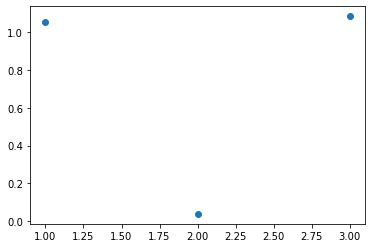

In [93]:
fig, ax = plt.subplots()

x = [1,0,1]
y = x + np.random.random(3)/10
ax.scatter(np.arange(1,len(x)+1), y);


In [72]:
# helper function - plot the probability of the fair coin with increased flips

def plot_pfair_prob(num_flips, p_fair_arr, data):
    fig, axs = plt.subplots(2,1,figsize=(10,10))
    flip_num = np.arange(1, num_flips + 1)
    axs[0].scatter(np.arange(1,num_flips+1), data+np.random.random(len(data))/10, marker='.')
    axs[0].plot(np.arange(1,num_flips+1),np.cumsum(data)/np.arange(1,num_flips+1))
    axs[0].axhline(.5, color = 'green', linestyle = '--')
    axs[0].axhline(p, color = 'green', linestyle = '--')
    axs[0].set_title('Actual Flips and Running Average')
    axs[1].plot(flip_num, p_fair_arr)
    axs[1].set_ylim([-0.1, 1.1])
    axs[1].set_title('Probability of fair coin as a function of flip number')
    axs[1].set_ylabel('Probability p_fair')
    axs[1].set_xlabel('Flip number')
    plt.tight_layout()
    plt.show()

It's the unfair coin (p = 0.4).
flips_lst: [1]
likelihoods: [0.5, 0.4]
posteriors: [0.55555556 0.44444444]
p_fair_arr: [0.55555556 0.         0.        ]
priors: [0.55555556 0.44444444]
flips_lst: [1, 0]
likelihoods: [0.5, 0.6]
posteriors: [0.51020408 0.48979592]
p_fair_arr: [0.55555556 0.51020408 0.        ]
priors: [0.51020408 0.48979592]
flips_lst: [1, 0, 1]
likelihoods: [0.5, 0.4]
posteriors: [0.56561086 0.43438914]
p_fair_arr: [0.55555556 0.51020408 0.56561086]
priors: [0.56561086 0.43438914]

Posteriors after 3 trials
Probability Fair 0.566, Not fair 0.434


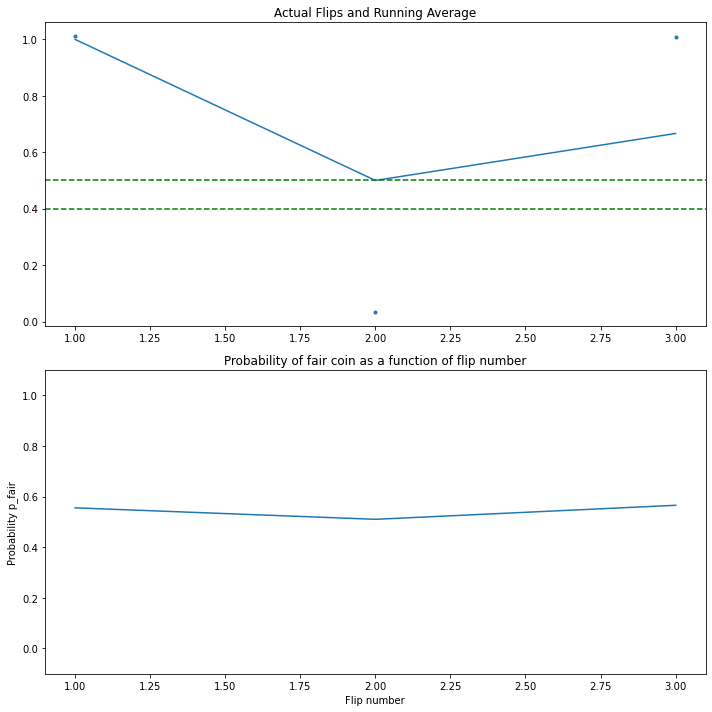

In [84]:
# lets do a simulation0
# np.random.seed(2) # try 2 and 3

indicate_coin_picked(p)

# initialize
priors = [0.5, 0.5]
flips_lst = []

# set the number of flips
num_flips = 3
p_fair_arr = np.zeros(num_flips)

for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    print(f'flips_lst: {flips_lst}')
    likelihoods = calculate_likelihood(flips_lst)
    print(f'likelihoods: {likelihoods}')
    posteriors = calc_posterior(likelihoods, priors)
    print(f'posteriors: {posteriors}')
    p_fair_arr[i] = posteriors[0]
    print(f'p_fair_arr: {p_fair_arr}')
    priors = posteriors
    print(f'priors: {priors}')

print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr, flips_lst)

It's the unfair coin (p = 0.4).

Posteriors after 2000 trials
Probability Fair 0.000, Not fair 1.000


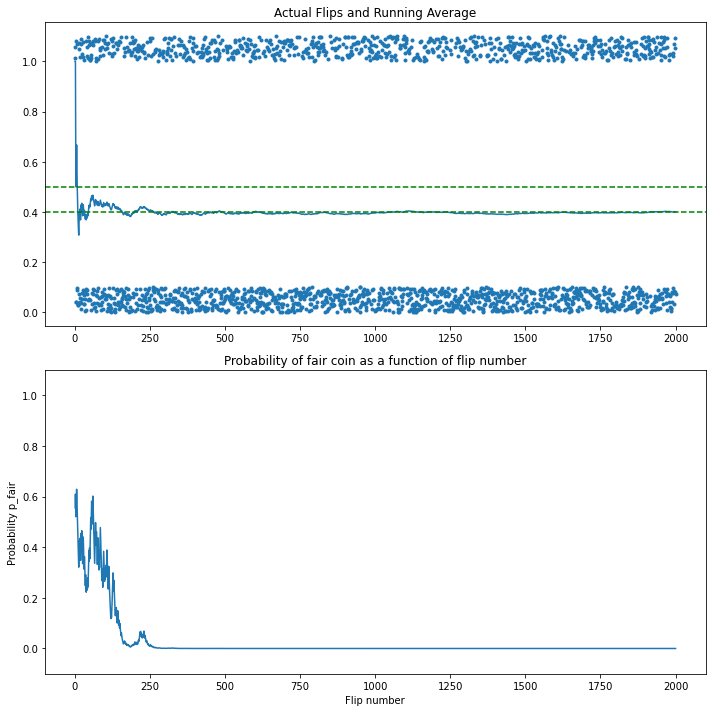

In [83]:
# lets do a simulation0
# np.random.seed(2) # try 2 and 3

indicate_coin_picked(p)

# initialize
priors = [0.5, 0.5]
flips_lst = []

# set the number of flips
num_flips = 2000
p_fair_arr = np.zeros(num_flips)

for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    likelihoods = calculate_likelihood(flips_lst)
    posteriors = calculate_posterior(likelihoods, priors)
    p_fair_arr[i] = posteriors[0]
    priors = posteriors

print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr, flips_lst)

### Seems very sensitive to updates.  Let's add a tuning dial (learning rate) that affects how much each update can affect the posteriors.

In [94]:
marginal = 1  # placeholder, p(Flips) is same for both fair and unfair 

def normalize(lst):
    total = sum(lst)
    return [val/total for val in lst]

def calculate_posterior_with_learning_rate(likelihoods_lst, prior_lst, learning_rate):
    '''Calculates the posterior given the likelihoods and prior'''
    posterior_unnormalized = []
    for likelihood, prior in zip(likelihoods_lst, prior_lst):
        posterior_unnormalized.append(likelihood * prior / marginal)
    
    # now need to normalize so that the total probability in posterior is 1
    posterior_lst = normalize(posterior_unnormalized)
    
    # now weight returned posterior by new posterior and old posterior
    posterior_weighted_unnorm = []
    for posterior, prior in zip(posterior_lst, prior_lst):
        posterior_weighted_unnorm.append(learning_rate * posterior + 
                                         (1 - learning_rate) * prior)
    posterior_weighted = normalize(posterior_weighted_unnorm)
    return posterior_weighted

It's the unfair coin (p = 0.4).

Posteriors after 2000 trials
Probability Fair 0.000, Not fair 1.000


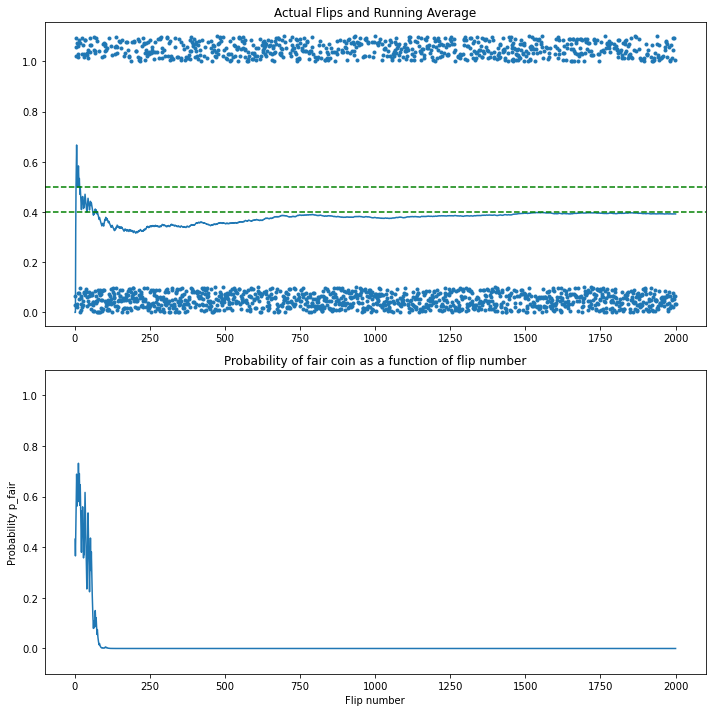

In [95]:
indicate_coin_picked(p)

# initialize

priors = [0.5, 0.5]

learning_rate = 1.5

flips_lst = []

# set the number of flips
num_flips = 2000
p_fair_arr = np.zeros(num_flips)


for i in range(num_flips):
    flip_the_coin(p, flips_lst)
    likelihoods = calculate_likelihood(flips_lst)
    posteriors = calculate_posterior_with_learning_rate(likelihoods, priors, learning_rate)
    p_fair_arr[i] = posteriors[0]
    priors = posteriors


print("\nPosteriors after {0} trials".format(num_flips))
print("Probability Fair {0:0.3f}, Not fair {1:0.3f}".format(posteriors[0], posteriors[1]))

plot_pfair_prob(num_flips, p_fair_arr, flips_lst)